## Library

In [1]:
import os
import math
import random

import numpy as np
import matplotlib.pyplot as plt

import squigglepy as sq
from squigglepy import bayes
from squigglepy.numbers import K, M, B, T

from copy import copy, deepcopy
from scipy import stats
from pprint import pprint
from datetime import datetime as dt
print('Loaded 1')

exec(open('utils.py').read())
print('Loaded 2')

exec(open('modules/tai_timelines.py').read())
print('Loaded TAI timelines module')


Loaded 1
Loaded 2
Loaded TAI timelines module


## Variables

In [2]:
# Global variables - probably don't want to change these but you could.
RUNS = 10000                                      # Number of runs to do (default 10000)
MAX_YEAR = CURRENT_YEAR + 100                     # What year to end the run on?
years = list(range(CURRENT_YEAR, MAX_YEAR))       # CURRENT_YEAR defined in utils.py
VARIABLE_SETS = {}


VARIABLE_SETS['Cotra2020'] = {
    'initial_gdp': 23*T,                  # GDP in `CURRENT_YEAR` of country that will develop TAI (default: 23 trillion)
    'algo_doubling_rate_max': 3.5,        # 90% CI, algorithms get twice as efficient every X years (maximum)
    'algo_doubling_rate_min': 2,          # 90% CI, algorithms get twice as efficient every X years (minimum)
    'min_reduction': 2,                   # 90% CI, the minimum amount of OOMs of reduction in TAI size algorithm improvements could acheive
    'max_reduction': 5,                   # 90% CI, the maximum amount of OOMs of reduction in TAI size algorithm improvements could acheive
    'initial_flop_per_dollar': 17.48,     # 90% CI, as of today, we can buy 10^X FLOP per $ (originally 17 for 2020)
    'flop_halving_rate': 2.5,             # 90% CI, the cost of FLOP per $ halves every X years
    'max_flop_per_dollar': 24,            # 90% CI, the cheapest FLOP will get is 10^X FLOPs per $
    'initial_pay': 9,                     # 90% CI, as of today the maximum we would pay for TAI is $10^X (originally 8.7 for 2020)
    'gdp_growth': 1.03,                   # 90% CI, GDP will increase by a factor of X each year
    'max_gdp_frac': 0.01,                 # 90% CI, the maximum % of GDP that would be spent on TAI is $10^X
    'spend_doubling_time': 2.5            # 90% CI, our willingness to spend on TAI doubles every X years
}


VARIABLE_SETS['Cotra2022'] = deepcopy(VARIABLE_SETS['Cotra2020'])
VARIABLE_SETS['Cotra2022']['initial_flop_per_dollar'] = 18.3 # (originally 18 for 2020)
print('Loaded')

Loaded


In [3]:
cotra_2020_tai_flop_size = sq.sample(load_cache_file='caches/cotra_2020')  # Cache generated in "Anchors" notebook
print('Cache from: {}'.format(dt.fromtimestamp(os.path.getmtime('caches/cotra_2020.sqcache.npy'))))

cotra_2020_tai_flop_size = [round(t, 1) for t in cotra_2020_tai_flop_size]
# 90% CI, it takes 10^X FLOP to run a transformative AI at inference.
# Note: A petaflop/s-day (pfs-day) consists of performing 10^15 neural net operations per second for one day, or a total of about 10^20 operations
VARIABLE_SETS['Cotra2020']['tai_flop_size'] = cotra_2020_tai_flop_size
sq.get_percentiles(cotra_2020_tai_flop_size)


Cache from: 2024-03-15 15:24:40.256540


{1: 25.9,
 5: 27.3,
 10: 28.3,
 20: 30.2,
 30: 32.0,
 40: 33.6,
 50: 35.2,
 60: 36.8,
 70: 38.7,
 80: 41.1,
 90: 46.1,
 95: 63.7,
 99: 68.1}

In [4]:
cotra_2022_tai_flop_size = sq.sample(load_cache_file='caches/cotra_2022')  # Cache generated in "Anchors" notebook
print('Cache from: {}'.format(dt.fromtimestamp(os.path.getmtime('caches/cotra_2022.sqcache.npy'))))
cotra_2022_tai_flop_size = [round(t, 1) for t in cotra_2022_tai_flop_size]
VARIABLE_SETS['Cotra2022']['tai_flop_size'] = cotra_2022_tai_flop_size
sq.get_percentiles(cotra_2022_tai_flop_size)

Cache from: 2024-03-15 15:25:20.183259


{1: 25.399,
 5: 26.5,
 10: 27.3,
 20: 28.5,
 30: 29.9,
 40: 31.4,
 50: 32.9,
 60: 34.5,
 70: 36.3,
 80: 38.5,
 90: 42.2,
 95: 50.20999999999986,
 99: 67.7}

## Run Cotra 2020



## SAMPLE RUN 1 ##

In this simulation:
* It takes 31.3 log FLOP (~20.0 nonillion) for transformative capabilities.
* Every 3.0 years algorithms get 2x better, with 2 log reductions possible.
* FLOP start at a cost of 17.5 log FLOP (~302.0 quadrillion) per 2024$USD.
* Every 2.5 years they get 2x cheaper, to a maximum of 24.0 log FLOP (~1.0 septillion) per 2024$USD.
* We are initially willing to pay 9.0 log 2024$USD (~995.7 million).
* This doubles every 2.5 year to a max of 1.0% of GDP (initially ~230.0 billion 2024$USD).
* GDP grows at a rate of 1.03x per year.
---
2024 - TAI takes 31.3 logFLOP which costs 13.8 log 2024$USD to buy vs. WTP at 9.0 (buys 26.5 log FLOP or 26.5 2024-log-eFLOP)
2025 - TAI takes 31.2 logFLOP which costs 13.6 log 2024$USD to buy vs. WTP at 9.1 (buys 26.7 log FLOP or 26.8 2024-log-eFLOP)
2026 - TAI takes 31.1 logFLOP which costs 13.4 log 2024$USD to buy vs. WTP at 9.2 (buys 27.0 log FLOP or 27.2 2024-log-eFLOP)
2027 - TAI takes 31.0 logFLOP which costs 13.2 

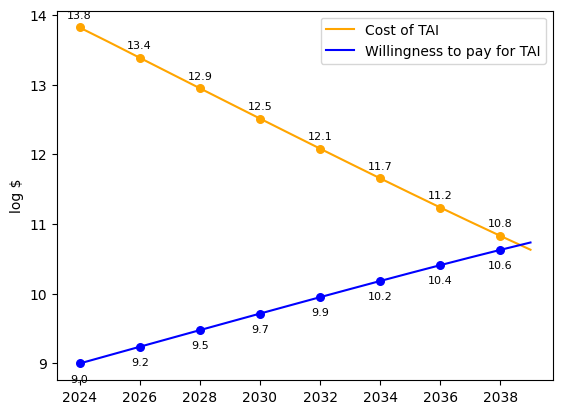



## SAMPLE RUN 2 ##

In this simulation:
* It takes 47.8 log FLOP (~631.0 trillion decillion) for transformative capabilities.
* Every 2 years algorithms get 2x better, with 5 log reductions possible.
* FLOP start at a cost of 17.5 log FLOP (~302.0 quadrillion) per 2024$USD.
* Every 2.5 years they get 2x cheaper, to a maximum of 24.0 log FLOP (~1.0 septillion) per 2024$USD.
* We are initially willing to pay 9.0 log 2024$USD (~995.7 million).
* This doubles every 2.5 year to a max of 1.0% of GDP (initially ~230.0 billion 2024$USD).
* GDP grows at a rate of 1.03x per year.
---
2024 - TAI takes 47.8 logFLOP which costs 30.3 log 2024$USD to buy vs. WTP at 9.0 (buys 26.5 log FLOP or 26.5 2024-log-eFLOP)
2025 - TAI takes 47.6 logFLOP which costs 30.0 log 2024$USD to buy vs. WTP at 9.1 (buys 26.7 log FLOP or 26.9 2024-log-eFLOP)
2026 - TAI takes 47.5 logFLOP which costs 29.8 log 2024$USD to buy vs. WTP at 9.2 (buys 27.0 log FLOP or 27.3 2024-log-eFLOP)
2027 - TAI takes 47.3 logFLOP which cos

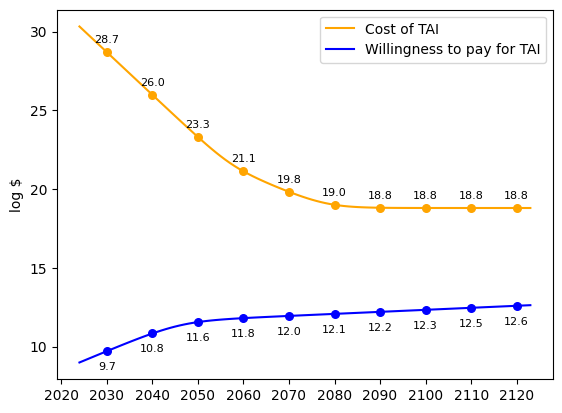



## SAMPLE RUN 3 ##

In this simulation:
* It takes 36.7 log FLOP (~5.0 thousand decillion) for transformative capabilities.
* Every 2 years algorithms get 2x better, with 3 log reductions possible.
* FLOP start at a cost of 17.5 log FLOP (~302.0 quadrillion) per 2024$USD.
* Every 2.5 years they get 2x cheaper, to a maximum of 24.0 log FLOP (~1.0 septillion) per 2024$USD.
* We are initially willing to pay 9.0 log 2024$USD (~995.7 million).
* This doubles every 2.5 year to a max of 1.0% of GDP (initially ~230.0 billion 2024$USD).
* GDP grows at a rate of 1.03x per year.
---
2024 - TAI takes 36.7 logFLOP which costs 19.2 log 2024$USD to buy vs. WTP at 9.0 (buys 26.5 log FLOP or 26.5 2024-log-eFLOP)
2025 - TAI takes 36.6 logFLOP which costs 18.9 log 2024$USD to buy vs. WTP at 9.1 (buys 26.7 log FLOP or 26.9 2024-log-eFLOP)
2026 - TAI takes 36.4 logFLOP which costs 18.7 log 2024$USD to buy vs. WTP at 9.2 (buys 27.0 log FLOP or 27.3 2024-log-eFLOP)
2027 - TAI takes 36.2 logFLOP which costs

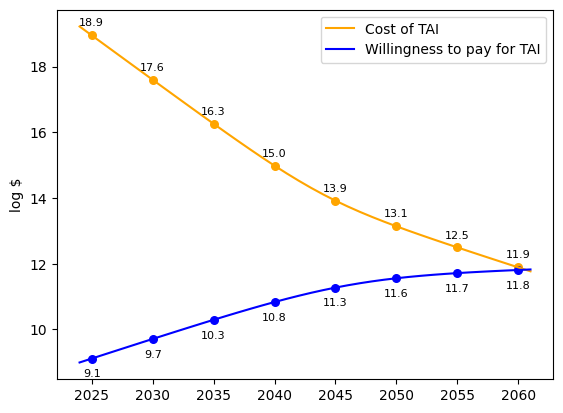



## RUN TIMELINES MODEL ##
Generating Bayes net with 5 cores...


100%|█████████████████████████████████████████████████████████| 10000/10000 [00:07<00:00, 1362.65it/s]


Shuffling data...
Writing data...
Waiting for other cores...


100%|██████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 561.62it/s]

...Collected!
Caching in-memory...
...Cached!
...Reducing
...Reduced!
...All done!

## DISTRIBUTION OF TAI ARRIVAL DATE ##
['5%: 2027',
 '10%: 2030',
 '15%: 2033',
 '20%: 2035',
 '25%: 2038',
 '35%: 2044',
 '50%: 2051',
 '60%: 2063',
 '75%: 2078',
 '80%: >2124',
 '90%: >2124',
 '95%: >2124']


## DISTRIBUTION OF RELATIVE TAI ARRIVAL DATE ##
['5%: 3 years from now',
 '10%: 6 years from now',
 '15%: 9 years from now',
 '20%: 11 years from now',
 '25%: 14 years from now',
 '35%: 20 years from now',
 '50%: 27 years from now',
 '60%: 39 years from now',
 '75%: 54 years from now',
 '80%: >100 years from now',
 '90%: >100 years from now',
 '95%: >100 years from now']
(Mean: 41 years from now)


## TAI ARRIVAL DATE BY BIN ##
This year: 2.1%
2025-2026: 2.6%
2027-2029: 4.2%
2030-2034: 8.8%
2035-2039: 9.4%
2040-2049: 20.2%
2050-2059: 10.3%
2060-2069: 13.4%
2070-2079: 4.7%
2080-2089: 1.0%
2090-2099: 0.7%
2100-2109: 0.2%
2110-2119: 0.4%
>2124: 21.7%


## TAI ARRIVAL DATE BY YEAR ##
By EOY 2024: 2.1

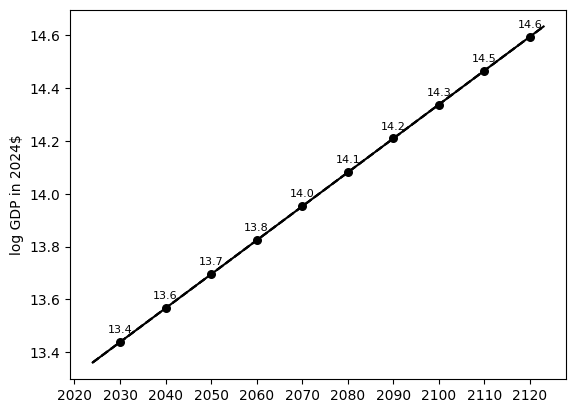

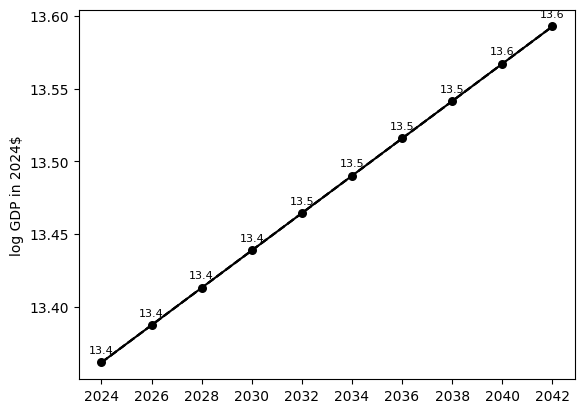



## Willingness to Pay Over Time ##
Year: 2024 - willingness log 2024$USD per year 9.0 (~995.7 million) 80% CI 9.0 (~995.7 million) - 9.0 (~995.7 million)
Year: 2025 - willingness log 2024$USD per year 9.1 (~1.3 billion) 80% CI 9.1 (~1.3 billion) - 9.1 (~1.3 billion)
Year: 2026 - willingness log 2024$USD per year 9.2 (~1.7 billion) 80% CI 9.2 (~1.7 billion) - 9.2 (~1.7 billion)
Year: 2027 - willingness log 2024$USD per year 9.4 (~2.3 billion) 80% CI 9.4 (~2.3 billion) - 9.4 (~2.3 billion)
Year: 2028 - willingness log 2024$USD per year 9.5 (~3.0 billion) 80% CI 9.5 (~3.0 billion) - 9.5 (~3.0 billion)
Year: 2029 - willingness log 2024$USD per year 9.6 (~3.9 billion) 80% CI 9.6 (~3.9 billion) - 9.6 (~3.9 billion)
Year: 2030 - willingness log 2024$USD per year 9.7 (~5.2 billion) 80% CI 9.7 (~5.2 billion) - 9.7 (~5.2 billion)
Year: 2031 - willingness log 2024$USD per year 9.8 (~6.8 billion) 80% CI 9.8 (~6.8 billion) - 9.8 (~6.8 billion)
Year: 2032 - willingness log 2024$USD per year 9.9 (~

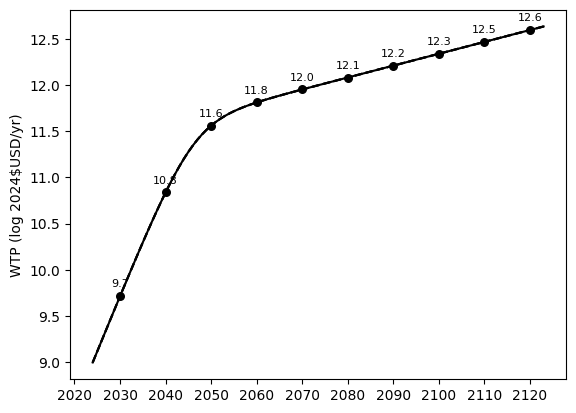

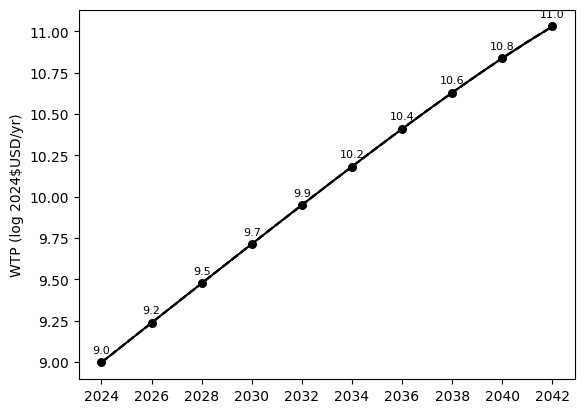



## Actual FLOP Needed to Make TAI (Given Algorithmic Progress) ##
Year: 2024 - logFLOP needed for TAI 35.1 (~125.9 decillion) 80% CI 29.9 (~794.3 octillion) - 40.9 (~79.4 million decillion)
Year: 2025 - logFLOP needed for TAI 35.0 (~89.1 decillion) 80% CI 29.8 (~659.6 octillion) - 40.7 (~56.2 million decillion)
Year: 2026 - logFLOP needed for TAI 34.8 (~63.1 decillion) 80% CI 29.7 (~542.5 octillion) - 40.6 (~39.7 million decillion)
Year: 2027 - logFLOP needed for TAI 34.6 (~44.6 decillion) 80% CI 29.6 (~446.4 octillion) - 40.4 (~28.1 million decillion)
Year: 2028 - logFLOP needed for TAI 34.5 (~31.6 decillion) 80% CI 29.6 (~367.7 octillion) - 40.3 (~19.9 million decillion)
Year: 2029 - logFLOP needed for TAI 34.3 (~22.4 decillion) 80% CI 29.5 (~303.0 octillion) - 40.1 (~14.0 million decillion)
Year: 2030 - logFLOP needed for TAI 34.2 (~15.9 decillion) 80% CI 29.4 (~250.0 octillion) - 40.0 (~9.9 million decillion)
Year: 2031 - logFLOP needed for TAI 34.1 (~11.3 decillion) 80% CI 29.3 

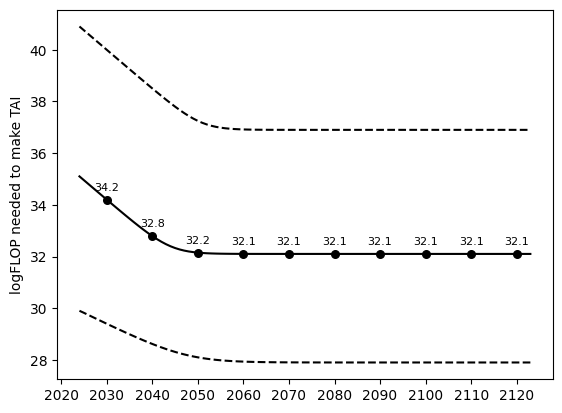

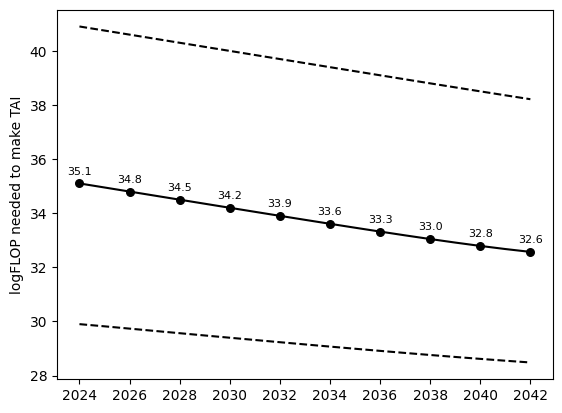



## FLOP per Dollar (Given Declining Costs) ##
Year: 2024 - logFLOP per 2024$1USD 17.5 (~302.0 quadrillion) 80% CI 17.5 (~302.0 quadrillion) - 17.5 (~302.0 quadrillion)
Year: 2025 - logFLOP per 2024$1USD 17.6 (~398.5 quadrillion) 80% CI 17.6 (~398.5 quadrillion) - 17.6 (~398.5 quadrillion)
Year: 2026 - logFLOP per 2024$1USD 17.7 (~525.8 quadrillion) 80% CI 17.7 (~525.8 quadrillion) - 17.7 (~525.8 quadrillion)
Year: 2027 - logFLOP per 2024$1USD 17.8 (~693.8 quadrillion) 80% CI 17.8 (~693.8 quadrillion) - 17.8 (~693.8 quadrillion)
Year: 2028 - logFLOP per 2024$1USD 18.0 (~915.5 quadrillion) 80% CI 18.0 (~915.5 quadrillion) - 18.0 (~915.5 quadrillion)
Year: 2029 - logFLOP per 2024$1USD 18.1 (~1.2 quintillion) 80% CI 18.1 (~1.2 quintillion) - 18.1 (~1.2 quintillion)
Year: 2030 - logFLOP per 2024$1USD 18.2 (~1.6 quintillion) 80% CI 18.2 (~1.6 quintillion) - 18.2 (~1.6 quintillion)
Year: 2031 - logFLOP per 2024$1USD 18.3 (~2.1 quintillion) 80% CI 18.3 (~2.1 quintillion) - 18.3 (~2.1 quintil

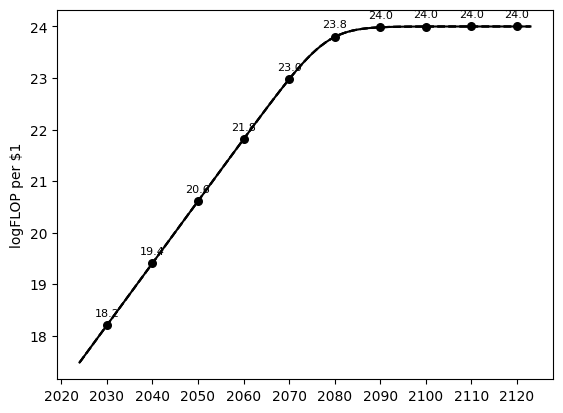

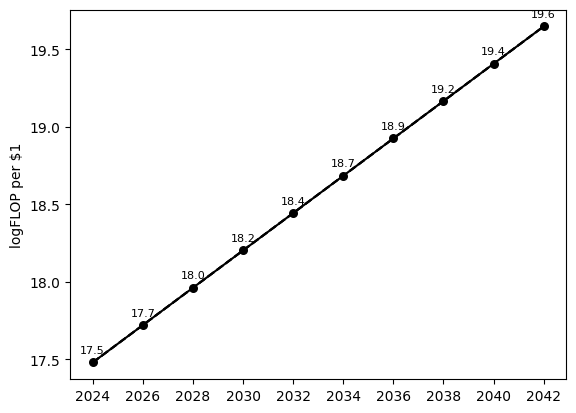



## Max Possible OOM Reduction in TAI FLOP Size ##
TAI log FLOP 20 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 21 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 22 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 23 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 24 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 25 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 26 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 27 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 28 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 29 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 30 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 31 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 32 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 33 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2

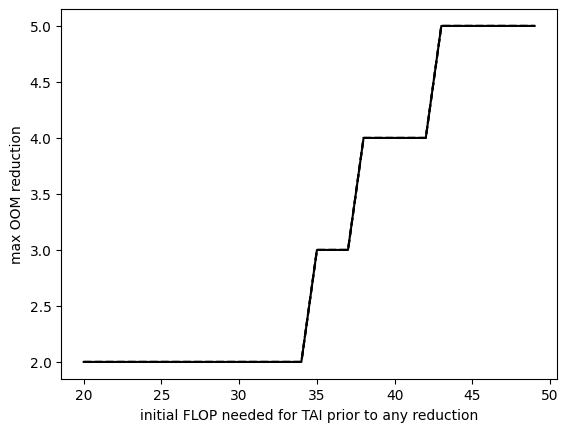



## Halving time (years) of compute requirements ##
TAI log FLOP 20 -> algo doubling rate 3.5yrs (80% CI: 3.5 to 3.5)
TAI log FLOP 21 -> algo doubling rate 3.5yrs (80% CI: 3.5 to 3.5)
TAI log FLOP 22 -> algo doubling rate 3.5yrs (80% CI: 3.5 to 3.5)
TAI log FLOP 23 -> algo doubling rate 3.5yrs (80% CI: 3.5 to 3.5)
TAI log FLOP 24 -> algo doubling rate 3.5yrs (80% CI: 3.5 to 3.5)
TAI log FLOP 25 -> algo doubling rate 3.5yrs (80% CI: 3.5 to 3.5)
TAI log FLOP 26 -> algo doubling rate 3.5yrs (80% CI: 3.5 to 3.5)
TAI log FLOP 27 -> algo doubling rate 3.5yrs (80% CI: 3.5 to 3.5)
TAI log FLOP 28 -> algo doubling rate 3.5yrs (80% CI: 3.5 to 3.5)
TAI log FLOP 29 -> algo doubling rate 3.5yrs (80% CI: 3.5 to 3.5)
TAI log FLOP 30 -> algo doubling rate 3.5yrs (80% CI: 3.5 to 3.5)
TAI log FLOP 31 -> algo doubling rate 3.0yrs (80% CI: 3.0 to 3.0)
TAI log FLOP 32 -> algo doubling rate 2.5yrs (80% CI: 2.5 to 2.5)
TAI log FLOP 33 -> algo doubling rate 2.5yrs (80% CI: 2.5 to 2.5)
TAI log FLOP 34 -> algo

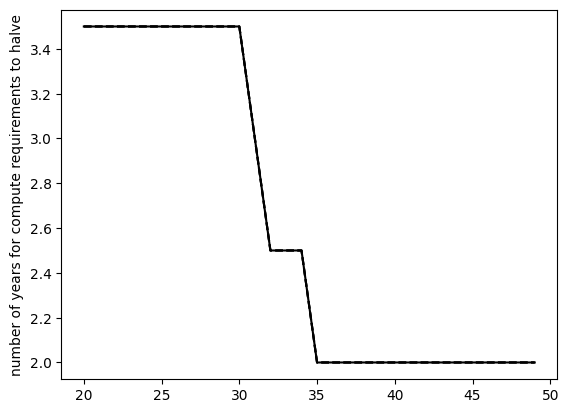



## Dollars Needed to Buy TAI (Given Algorithmic Progress and Decline in Cost per FLOP) ##
Year: 2024 - 17.6 log 2024$USD to buy TAI (~416.9 quadrillion) 80% CI 12.4 (~2.6 trillion) - 23.4 (~263.0 sextillion)
Year: 2025 - 17.3 log 2024$USD to buy TAI (~223.7 quadrillion) 80% CI 12.2 (~1.7 trillion) - 23.1 (~141.0 sextillion)
Year: 2026 - 17.1 log 2024$USD to buy TAI (~120.0 quadrillion) 80% CI 12.0 (~1.0 trillion) - 22.9 (~75.5 sextillion)
Year: 2027 - 16.8 log 2024$USD to buy TAI (~64.3 quadrillion) 80% CI 11.8 (~643.5 billion) - 22.6 (~40.5 sextillion)
Year: 2028 - 16.5 log 2024$USD to buy TAI (~34.5 quadrillion) 80% CI 11.6 (~401.6 billion) - 22.3 (~21.7 sextillion)
Year: 2029 - 16.3 log 2024$USD to buy TAI (~18.5 quadrillion) 80% CI 11.4 (~250.9 billion) - 22.1 (~11.6 sextillion)
Year: 2030 - 16.0 log 2024$USD to buy TAI (~10.0 quadrillion) 80% CI 11.2 (~156.9 billion) - 21.8 (~6.2 sextillion)
Year: 2031 - 15.7 log 2024$USD to buy TAI (~5.4 quadrillion) 80% CI 11.0 (~98.2 billion)

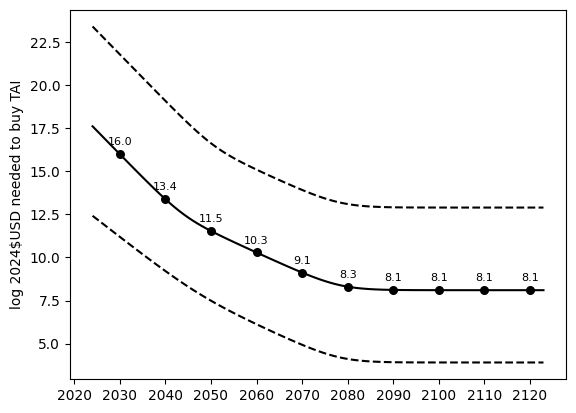

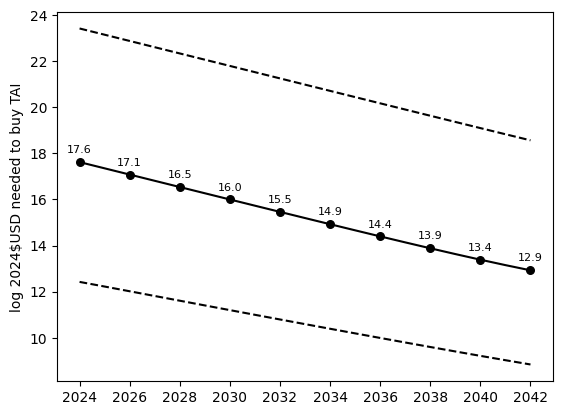



## Actual FLOP at Max Spend ##
Year: 2024 - max log FLOP 26.5 (~300.7 septillion) 80% CI 26.5 (~300.7 septillion) - 26.5 (~300.7 septillion)
Year: 2025 - max log FLOP 26.7 (~522.9 septillion) 80% CI 26.7 (~522.9 septillion) - 26.7 (~522.9 septillion)
Year: 2026 - max log FLOP 27.0 (~909.0 septillion) 80% CI 27.0 (~909.0 septillion) - 27.0 (~909.0 septillion)
Year: 2027 - max log FLOP 27.2 (~1.6 octillion) 80% CI 27.2 (~1.6 octillion) - 27.2 (~1.6 octillion)
Year: 2028 - max log FLOP 27.4 (~2.7 octillion) 80% CI 27.4 (~2.7 octillion) - 27.4 (~2.7 octillion)
Year: 2029 - max log FLOP 27.7 (~4.8 octillion) 80% CI 27.7 (~4.8 octillion) - 27.7 (~4.8 octillion)
Year: 2030 - max log FLOP 27.9 (~8.3 octillion) 80% CI 27.9 (~8.3 octillion) - 27.9 (~8.3 octillion)
Year: 2031 - max log FLOP 28.2 (~14.3 octillion) 80% CI 28.2 (~14.3 octillion) - 28.2 (~14.3 octillion)
Year: 2032 - max log FLOP 28.4 (~24.7 octillion) 80% CI 28.4 (~24.7 octillion) - 28.4 (~24.7 octillion)
Year: 2033 - max log FLOP

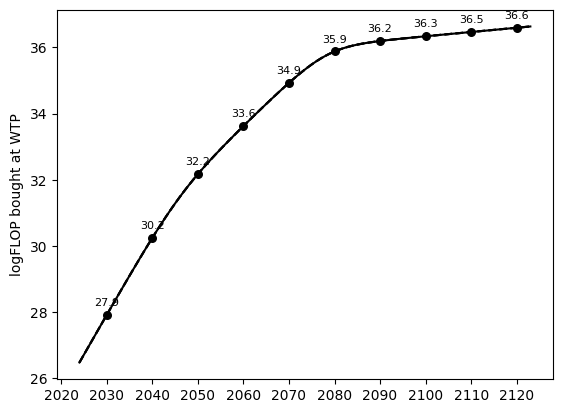

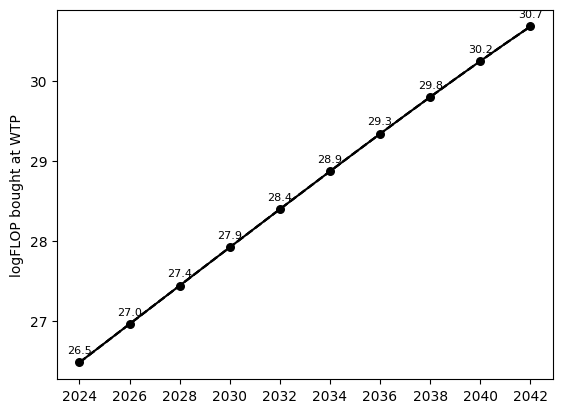



## Effective 2024-FLOP at Max Spend (given algorithmic progress and decline in $/FLOP) ##
Year: 2024 - max log effective 2024-FLOP 26.5 (~300.7 septillion) 80% CI 26.5 (~300.7 septillion) - 26.5 (~300.7 septillion)
Year: 2025 - max log effective 2024-FLOP 26.9 (~738.4 septillion) 80% CI 26.8 (~629.7 septillion) - 26.9 (~739.4 septillion)
Year: 2026 - max log effective 2024-FLOP 27.3 (~1.8 octillion) 80% CI 27.1 (~1.3 octillion) - 27.3 (~1.8 octillion)
Year: 2027 - max log effective 2024-FLOP 27.6 (~4.5 octillion) 80% CI 27.4 (~2.8 octillion) - 27.6 (~4.5 octillion)
Year: 2028 - max log effective 2024-FLOP 28.0 (~10.9 octillion) 80% CI 27.8 (~5.9 octillion) - 28.0 (~11.0 octillion)
Year: 2029 - max log effective 2024-FLOP 28.4 (~26.8 octillion) 80% CI 28.1 (~12.5 octillion) - 28.4 (~26.9 octillion)
Year: 2030 - max log effective 2024-FLOP 28.8 (~65.5 octillion) 80% CI 28.4 (~26.2 octillion) - 28.8 (~66.0 octillion)
Year: 2031 - max log effective 2024-FLOP 29.2 (~159.9 octillion) 80% C

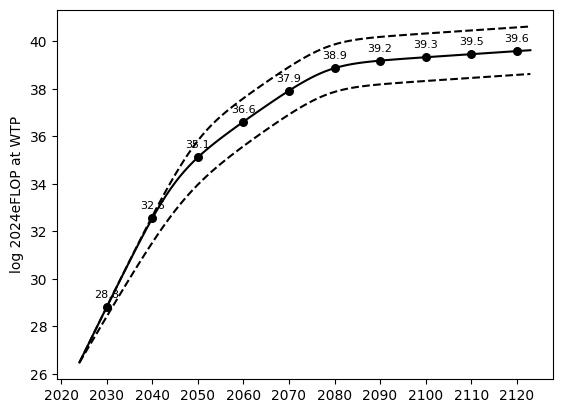

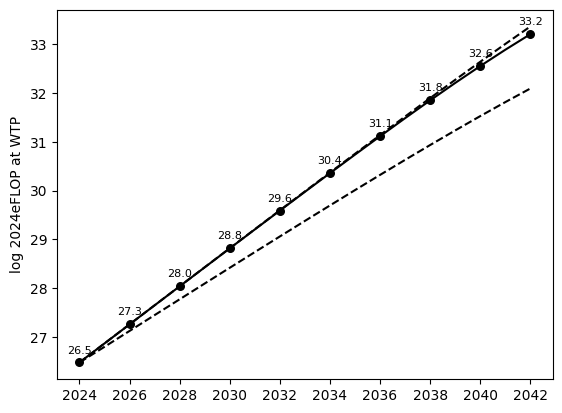


## TAI FLOP SIZE ##
{1: 26.2,
 5: 27.195,
 10: 28.1,
 20: 29.9,
 30: 31.7,
 40: 33.4,
 50: 35.1,
 60: 36.54,
 70: 38.3,
 80: 40.9,
 90: 46.11000000000001,
 95: 63.11999999999998,
 99: 66.80199999999999}


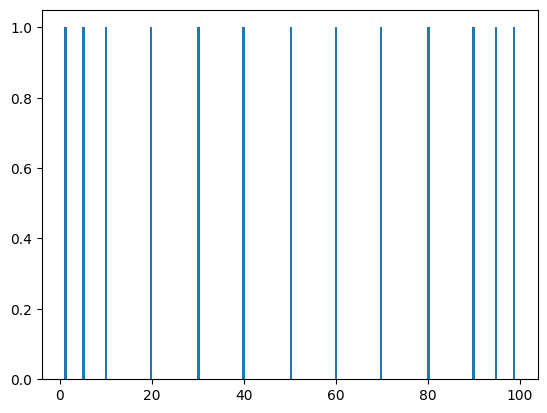



## MIN REDUCTION: 2 ##

## MAX REDUCTION: 5 ##

## MIN ALGO DOUBLING RATE: 2 ##

## MAX ALGO DOUBLING RATE: 3.5 ##

## INITIAL FLOP PER DOLLAR: 17.48 ##

## FLOP HALVING RATE: 2.5 ##

## MAX FLOP PER DOLLAR: 24 ##

## INITIAL PAY: 9 ##

## INITIAL GDP: 23000000000000 ##

## GDP GROWTH: 1.03 ##

## MAX GDP FRAC: 0.01 ##

## SPEND DOUBLING TIME: 2.5 ##



## Aggregate nonscaling delay probability ##
If TAI compute level achieved in 2024-2026... 0% chance of TAI nonscaling delay
If TAI compute level achieved in 2027-2030... 0% chance of TAI nonscaling delay
If TAI compute level achieved in 2031-2035... 0% chance of TAI nonscaling delay
If TAI compute level achieved in 2036-2040... 0% chance of TAI nonscaling delay
If TAI compute level achieved in 2041-2050... 0% chance of TAI nonscaling delay
If TAI compute level achieved in 2051-2060... 0% chance of TAI nonscaling delay
If TAI compute level achieved in 2061-2100... 0% chance of TAI nonscaling delay


## Aggregate nonscaling delay lengt

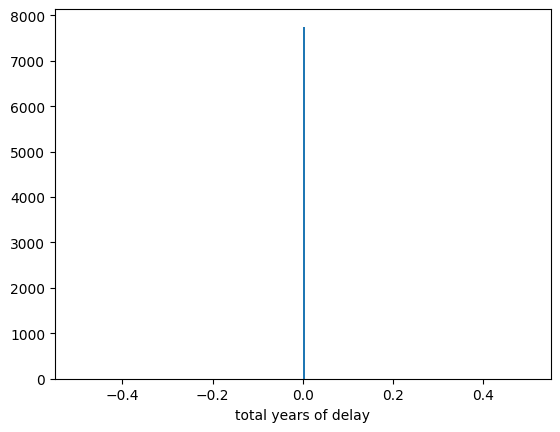

In [5]:
variables = VARIABLE_SETS['Cotra2020']
variables['RUNS'] = RUNS
variables['CURRENT_YEAR'] = CURRENT_YEAR
variables['MAX_YEAR'] = MAX_YEAR
run_timelines_model(variables, cores=5, runs=variables['RUNS'])

## Run Cotra 2022



## SAMPLE RUN 1 ##

In this simulation:
* It takes 43.4 log FLOP (~25.1 billion decillion) for transformative capabilities.
* Every 2 years algorithms get 2x better, with 5 log reductions possible.
* FLOP start at a cost of 18.3 log FLOP (~2.0 quintillion) per 2024$USD.
* Every 2.5 years they get 2x cheaper, to a maximum of 24.0 log FLOP (~1.0 septillion) per 2024$USD.
* We are initially willing to pay 9.0 log 2024$USD (~995.7 million).
* This doubles every 2.5 year to a max of 1.0% of GDP (initially ~230.0 billion 2024$USD).
* GDP grows at a rate of 1.03x per year.
---
2024 - TAI takes 43.4 logFLOP which costs 25.1 log 2024$USD to buy vs. WTP at 9.0 (buys 27.3 log FLOP or 27.3 2024-log-eFLOP)
2025 - TAI takes 43.2 logFLOP which costs 24.8 log 2024$USD to buy vs. WTP at 9.1 (buys 27.5 log FLOP or 27.7 2024-log-eFLOP)
2026 - TAI takes 43.1 logFLOP which costs 24.6 log 2024$USD to buy vs. WTP at 9.2 (buys 27.8 log FLOP or 28.1 2024-log-eFLOP)
2027 - TAI takes 42.9 logFLOP which costs 2

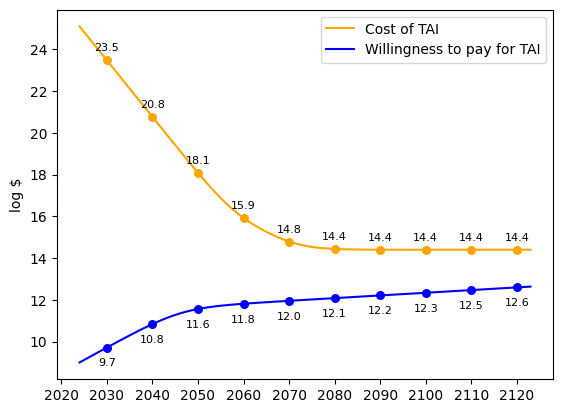



## SAMPLE RUN 2 ##

In this simulation:
* It takes 26.1 log FLOP (~125.9 septillion) for transformative capabilities.
* Every 3.5 years algorithms get 2x better, with 2 log reductions possible.
* FLOP start at a cost of 18.3 log FLOP (~2.0 quintillion) per 2024$USD.
* Every 2.5 years they get 2x cheaper, to a maximum of 24.0 log FLOP (~1.0 septillion) per 2024$USD.
* We are initially willing to pay 9.0 log 2024$USD (~995.7 million).
* This doubles every 2.5 year to a max of 1.0% of GDP (initially ~230.0 billion 2024$USD).
* GDP grows at a rate of 1.03x per year.
---
2024 - TAI takes 26.1 logFLOP which costs 7.8 log 2024$USD to buy vs. WTP at 9.0 (buys 27.3 log FLOP or 27.3 2024-log-eFLOP)
--- /!\ TAI CREATED in 2024


## SAMPLE RUN 3 ##

In this simulation:
* It takes 37.9 log FLOP (~79.4 thousand decillion) for transformative capabilities.
* Every 2 years algorithms get 2x better, with 3 log reductions possible.
* FLOP start at a cost of 18.3 log FLOP (~2.0 quintillion) per 2024$USD

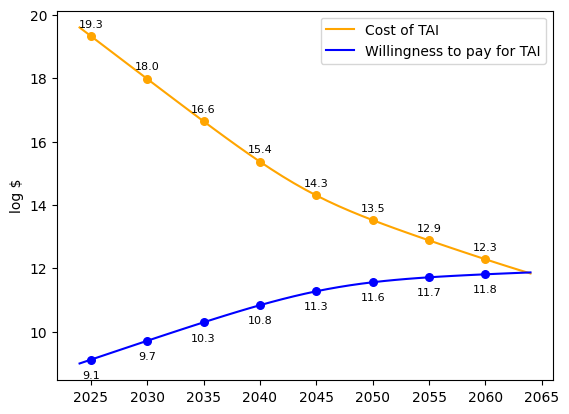



## RUN TIMELINES MODEL ##
Generating Bayes net with 5 cores...


100%|█████████████████████████████████████████████████████████| 10000/10000 [00:07<00:00, 1353.68it/s]


Shuffling data...
Writing data...
Waiting for other cores...


100%|██████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 561.62it/s]

...Collected!
Caching in-memory...
...Cached!
...Reducing
...Reduced!
...All done!

## DISTRIBUTION OF TAI ARRIVAL DATE ##
['5%: 2024',
 '10%: 2025',
 '15%: 2026',
 '20%: 2028',
 '25%: 2030',
 '35%: 2034',
 '50%: 2041',
 '60%: 2045',
 '75%: 2058',
 '80%: 2062',
 '90%: >2124',
 '95%: >2124']


## DISTRIBUTION OF RELATIVE TAI ARRIVAL DATE ##
['5%: 0 years from now',
 '10%: 1 years from now',
 '15%: 2 years from now',
 '20%: 4 years from now',
 '25%: 6 years from now',
 '35%: 10 years from now',
 '50%: 17 years from now',
 '60%: 21 years from now',
 '75%: 34 years from now',
 '80%: 38 years from now',
 '90%: >100 years from now',
 '95%: >100 years from now']
(Mean: 28 years from now)


## TAI ARRIVAL DATE BY BIN ##
This year: 9.4%
2025-2026: 6.3%
2027-2029: 7.9%
2030-2034: 11.6%
2035-2039: 12.7%
2040-2049: 19.7%
2050-2059: 9.1%
2060-2069: 7.0%
2070-2079: 2.1%
2080-2089: 0.1%
2090-2099: 0.6%
2100-2109: 0.1%
2110-2119: 0.1%
>2124: 13.0%


## TAI ARRIVAL DATE BY YEAR ##
By EOY 2024: 9.4%
By 

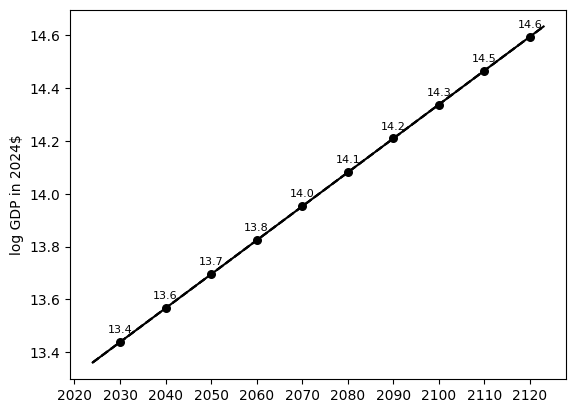

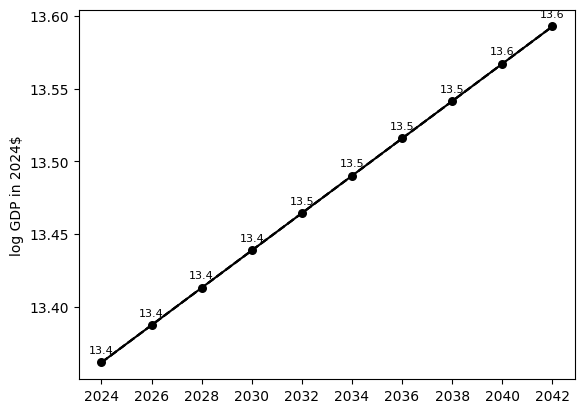



## Willingness to Pay Over Time ##
Year: 2024 - willingness log 2024$USD per year 9.0 (~995.7 million) 80% CI 9.0 (~995.7 million) - 9.0 (~995.7 million)
Year: 2025 - willingness log 2024$USD per year 9.1 (~1.3 billion) 80% CI 9.1 (~1.3 billion) - 9.1 (~1.3 billion)
Year: 2026 - willingness log 2024$USD per year 9.2 (~1.7 billion) 80% CI 9.2 (~1.7 billion) - 9.2 (~1.7 billion)
Year: 2027 - willingness log 2024$USD per year 9.4 (~2.3 billion) 80% CI 9.4 (~2.3 billion) - 9.4 (~2.3 billion)
Year: 2028 - willingness log 2024$USD per year 9.5 (~3.0 billion) 80% CI 9.5 (~3.0 billion) - 9.5 (~3.0 billion)
Year: 2029 - willingness log 2024$USD per year 9.6 (~3.9 billion) 80% CI 9.6 (~3.9 billion) - 9.6 (~3.9 billion)
Year: 2030 - willingness log 2024$USD per year 9.7 (~5.2 billion) 80% CI 9.7 (~5.2 billion) - 9.7 (~5.2 billion)
Year: 2031 - willingness log 2024$USD per year 9.8 (~6.8 billion) 80% CI 9.8 (~6.8 billion) - 9.8 (~6.8 billion)
Year: 2032 - willingness log 2024$USD per year 9.9 (~

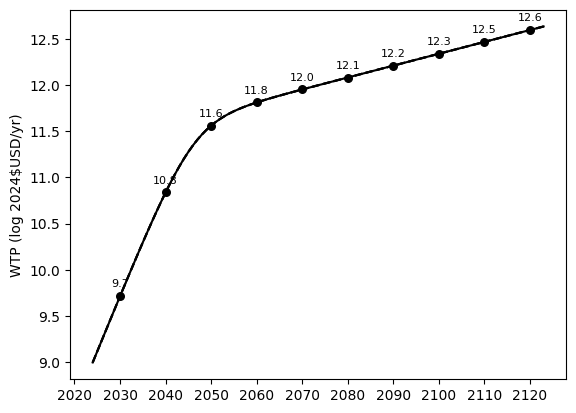

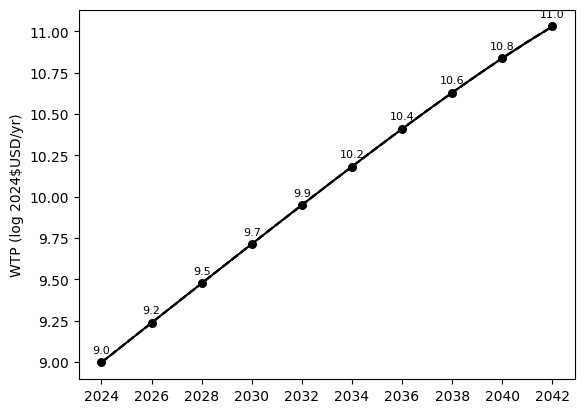



## Actual FLOP Needed to Make TAI (Given Algorithmic Progress) ##
Year: 2024 - logFLOP needed for TAI 33.4 (~2.5 decillion) 80% CI 28.5 (~31.6 octillion) - 39.0 (~1.0 million decillion)
Year: 2025 - logFLOP needed for TAI 33.3 (~1.9 decillion) 80% CI 28.4 (~26.3 octillion) - 38.8 (~707.2 thousand decillion)
Year: 2026 - logFLOP needed for TAI 33.2 (~1.5 decillion) 80% CI 28.3 (~21.6 octillion) - 38.7 (~500.1 thousand decillion)
Year: 2027 - logFLOP needed for TAI 33.0 (~1.1 decillion) 80% CI 28.2 (~17.8 octillion) - 38.5 (~353.7 thousand decillion)
Year: 2028 - logFLOP needed for TAI 32.9 (~853.7 nonillion) 80% CI 28.2 (~14.6 octillion) - 38.4 (~250.1 thousand decillion)
Year: 2029 - logFLOP needed for TAI 32.8 (~653.1 nonillion) 80% CI 28.1 (~12.1 octillion) - 38.2 (~176.9 thousand decillion)
Year: 2030 - logFLOP needed for TAI 32.7 (~501.0 nonillion) 80% CI 28.0 (~10.0 octillion) - 38.1 (~125.1 thousand decillion)
Year: 2031 - logFLOP needed for TAI 32.6 (~385.8 nonillion) 80% CI 2

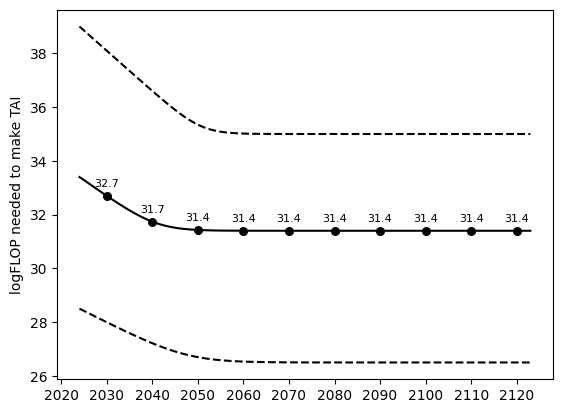

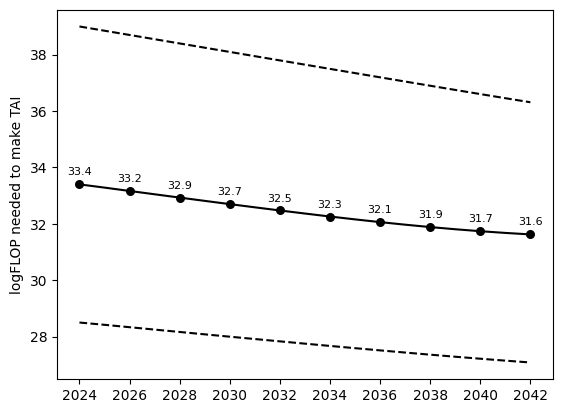



## FLOP per Dollar (Given Declining Costs) ##
Year: 2024 - logFLOP per 2024$1USD 18.3 (~2.0 quintillion) 80% CI 18.3 (~2.0 quintillion) - 18.3 (~2.0 quintillion)
Year: 2025 - logFLOP per 2024$1USD 18.4 (~2.6 quintillion) 80% CI 18.4 (~2.6 quintillion) - 18.4 (~2.6 quintillion)
Year: 2026 - logFLOP per 2024$1USD 18.5 (~3.5 quintillion) 80% CI 18.5 (~3.5 quintillion) - 18.5 (~3.5 quintillion)
Year: 2027 - logFLOP per 2024$1USD 18.7 (~4.6 quintillion) 80% CI 18.7 (~4.6 quintillion) - 18.7 (~4.6 quintillion)
Year: 2028 - logFLOP per 2024$1USD 18.8 (~6.0 quintillion) 80% CI 18.8 (~6.0 quintillion) - 18.8 (~6.0 quintillion)
Year: 2029 - logFLOP per 2024$1USD 18.9 (~8.0 quintillion) 80% CI 18.9 (~8.0 quintillion) - 18.9 (~8.0 quintillion)
Year: 2030 - logFLOP per 2024$1USD 19.0 (~10.5 quintillion) 80% CI 19.0 (~10.5 quintillion) - 19.0 (~10.5 quintillion)
Year: 2031 - logFLOP per 2024$1USD 19.1 (~13.9 quintillion) 80% CI 19.1 (~13.9 quintillion) - 19.1 (~13.9 quintillion)
Year: 2032 - logFL

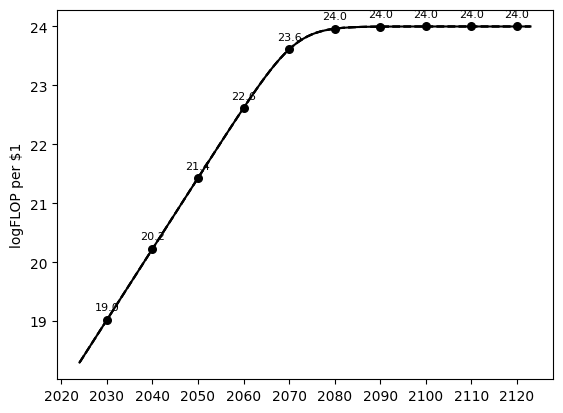

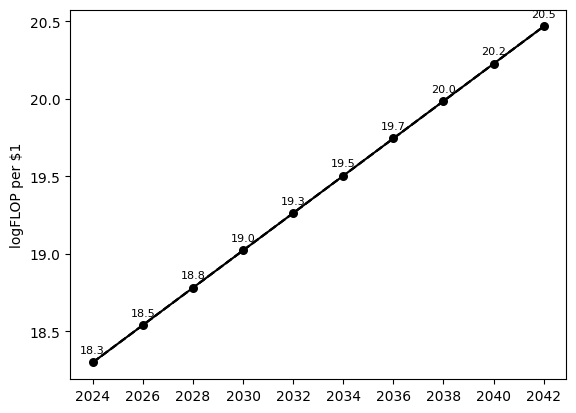



## Max Possible OOM Reduction in TAI FLOP Size ##
TAI log FLOP 20 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 21 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 22 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 23 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 24 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 25 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 26 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 27 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 28 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 29 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 30 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 31 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 32 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 33 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2

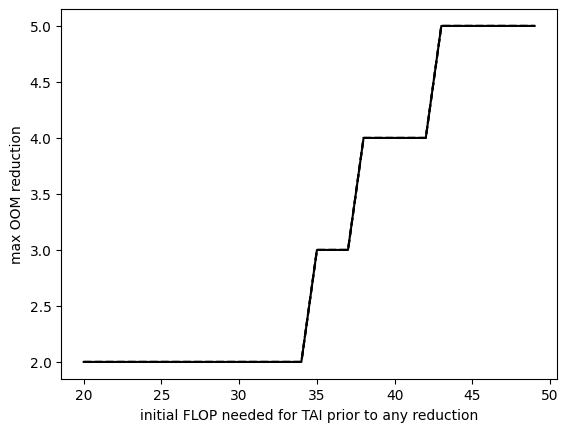



## Halving time (years) of compute requirements ##
TAI log FLOP 20 -> algo doubling rate 3.5yrs (80% CI: 3.5 to 3.5)
TAI log FLOP 21 -> algo doubling rate 3.5yrs (80% CI: 3.5 to 3.5)
TAI log FLOP 22 -> algo doubling rate 3.5yrs (80% CI: 3.5 to 3.5)
TAI log FLOP 23 -> algo doubling rate 3.5yrs (80% CI: 3.5 to 3.5)
TAI log FLOP 24 -> algo doubling rate 3.5yrs (80% CI: 3.5 to 3.5)
TAI log FLOP 25 -> algo doubling rate 3.5yrs (80% CI: 3.5 to 3.5)
TAI log FLOP 26 -> algo doubling rate 3.5yrs (80% CI: 3.5 to 3.5)
TAI log FLOP 27 -> algo doubling rate 3.5yrs (80% CI: 3.5 to 3.5)
TAI log FLOP 28 -> algo doubling rate 3.5yrs (80% CI: 3.5 to 3.5)
TAI log FLOP 29 -> algo doubling rate 3.5yrs (80% CI: 3.5 to 3.5)
TAI log FLOP 30 -> algo doubling rate 3.5yrs (80% CI: 3.5 to 3.5)
TAI log FLOP 31 -> algo doubling rate 3.0yrs (80% CI: 3.0 to 3.0)
TAI log FLOP 32 -> algo doubling rate 2.5yrs (80% CI: 2.5 to 2.5)
TAI log FLOP 33 -> algo doubling rate 2.5yrs (80% CI: 2.5 to 2.5)
TAI log FLOP 34 -> algo

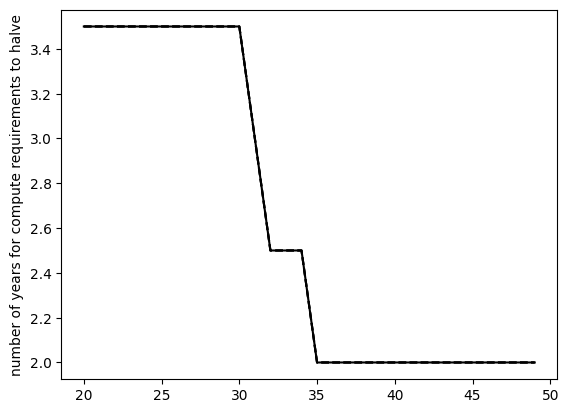



## Dollars Needed to Buy TAI (Given Algorithmic Progress and Decline in Cost per FLOP) ##
Year: 2024 - 15.1 log 2024$USD to buy TAI (~1.3 quadrillion) 80% CI 10.2 (~15.8 billion) - 20.7 (~501.2 quintillion)
Year: 2025 - 14.9 log 2024$USD to buy TAI (~732.6 trillion) 80% CI 10.0 (~10.0 billion) - 20.4 (~268.6 quintillion)
Year: 2026 - 14.6 log 2024$USD to buy TAI (~422.5 trillion) 80% CI 9.8 (~6.2 billion) - 20.2 (~144.0 quintillion)
Year: 2027 - 14.4 log 2024$USD to buy TAI (~244.0 trillion) 80% CI 9.6 (~3.9 billion) - 19.9 (~77.2 quintillion)
Year: 2028 - 14.1 log 2024$USD to buy TAI (~141.1 trillion) 80% CI 9.4 (~2.4 billion) - 19.6 (~41.3 quintillion)
Year: 2029 - 13.9 log 2024$USD to buy TAI (~81.8 trillion) 80% CI 9.2 (~1.5 billion) - 19.3 (~22.2 quintillion)
Year: 2030 - 13.7 log 2024$USD to buy TAI (~47.6 trillion) 80% CI 9.0 (~945.2 million) - 19.1 (~11.9 quintillion)
Year: 2031 - 13.4 log 2024$USD to buy TAI (~27.8 trillion) 80% CI 8.8 (~591.7 million) - 18.8 (~6.4 quintilli

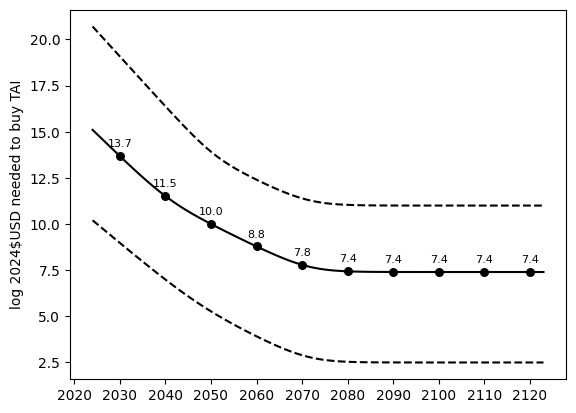

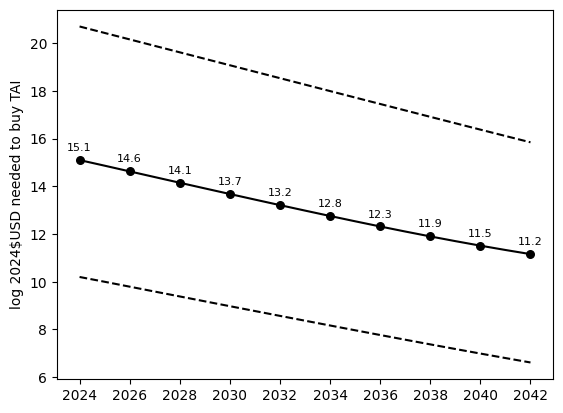



## Actual FLOP at Max Spend ##
Year: 2024 - max log FLOP 27.3 (~2.0 octillion) 80% CI 27.3 (~2.0 octillion) - 27.3 (~2.0 octillion)
Year: 2025 - max log FLOP 27.5 (~3.5 octillion) 80% CI 27.5 (~3.5 octillion) - 27.5 (~3.5 octillion)
Year: 2026 - max log FLOP 27.8 (~6.0 octillion) 80% CI 27.8 (~6.0 octillion) - 27.8 (~6.0 octillion)
Year: 2027 - max log FLOP 28.0 (~10.4 octillion) 80% CI 28.0 (~10.4 octillion) - 28.0 (~10.4 octillion)
Year: 2028 - max log FLOP 28.3 (~18.1 octillion) 80% CI 28.3 (~18.1 octillion) - 28.3 (~18.1 octillion)
Year: 2029 - max log FLOP 28.5 (~31.5 octillion) 80% CI 28.5 (~31.5 octillion) - 28.5 (~31.5 octillion)
Year: 2030 - max log FLOP 28.7 (~54.5 octillion) 80% CI 28.7 (~54.5 octillion) - 28.7 (~54.5 octillion)
Year: 2031 - max log FLOP 29.0 (~94.4 octillion) 80% CI 29.0 (~94.4 octillion) - 29.0 (~94.4 octillion)
Year: 2032 - max log FLOP 29.2 (~163.3 octillion) 80% CI 29.2 (~163.3 octillion) - 29.2 (~163.3 octillion)
Year: 2033 - max log FLOP 29.5 (~282.

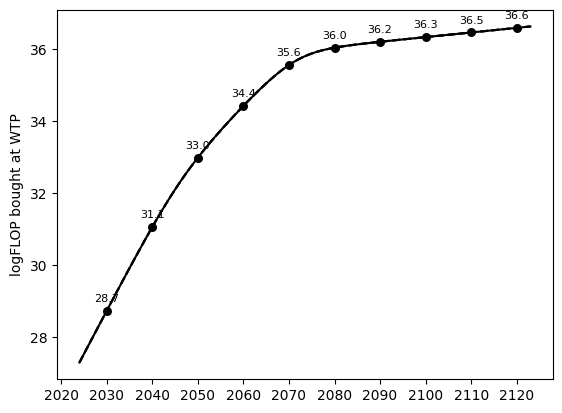

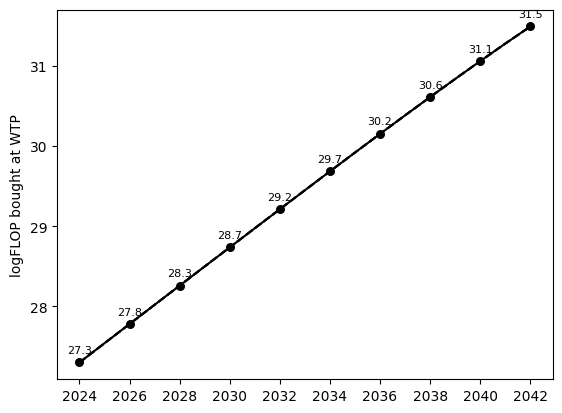



## Effective 2024-FLOP at Max Spend (given algorithmic progress and decline in $/FLOP) ##
Year: 2024 - max log effective 2024-FLOP 27.3 (~2.0 octillion) 80% CI 27.3 (~2.0 octillion) - 27.3 (~2.0 octillion)
Year: 2025 - max log effective 2024-FLOP 27.7 (~4.5 octillion) 80% CI 27.6 (~4.2 octillion) - 27.7 (~4.9 octillion)
Year: 2026 - max log effective 2024-FLOP 28.0 (~10.3 octillion) 80% CI 27.9 (~8.8 octillion) - 28.1 (~12.0 octillion)
Year: 2027 - max log effective 2024-FLOP 28.4 (~23.4 octillion) 80% CI 28.3 (~18.6 octillion) - 28.5 (~29.5 octillion)
Year: 2028 - max log effective 2024-FLOP 28.7 (~53.3 octillion) 80% CI 28.6 (~39.2 octillion) - 28.9 (~72.5 octillion)
Year: 2029 - max log effective 2024-FLOP 29.1 (~121.0 octillion) 80% CI 28.9 (~82.4 octillion) - 29.2 (~177.8 octillion)
Year: 2030 - max log effective 2024-FLOP 29.4 (~273.4 octillion) 80% CI 29.2 (~173.3 octillion) - 29.6 (~435.9 octillion)
Year: 2031 - max log effective 2024-FLOP 29.8 (~615.0 octillion) 80% CI 29.6 

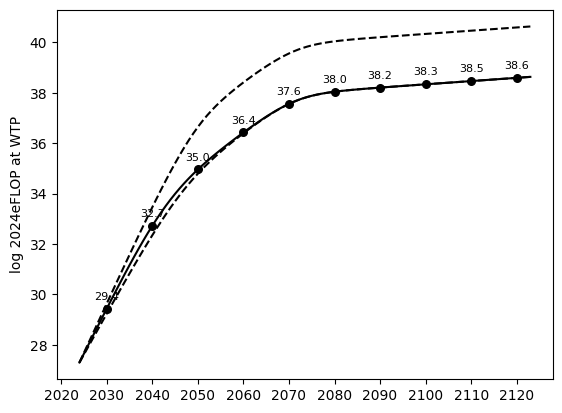

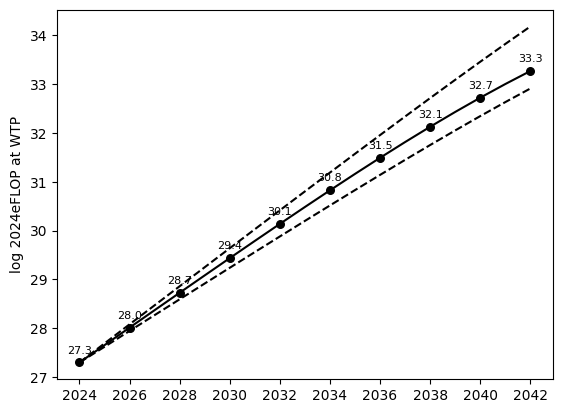


## TAI FLOP SIZE ##
{1: 25.3,
 5: 26.5,
 10: 27.3,
 20: 28.5,
 30: 30.0,
 40: 31.8,
 50: 33.4,
 60: 34.7,
 70: 36.8,
 80: 39.0,
 90: 42.71000000000001,
 95: 61.80499999999999,
 99: 68.5}


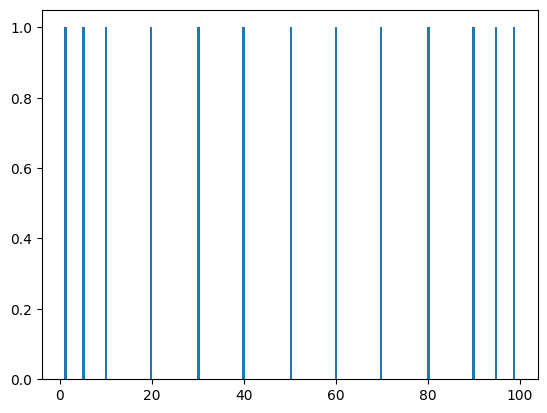



## MIN REDUCTION: 2 ##

## MAX REDUCTION: 5 ##

## MIN ALGO DOUBLING RATE: 2 ##

## MAX ALGO DOUBLING RATE: 3.5 ##

## INITIAL FLOP PER DOLLAR: 18.3 ##

## FLOP HALVING RATE: 2.5 ##

## MAX FLOP PER DOLLAR: 24 ##

## INITIAL PAY: 9 ##

## INITIAL GDP: 23000000000000 ##

## GDP GROWTH: 1.03 ##

## MAX GDP FRAC: 0.01 ##

## SPEND DOUBLING TIME: 2.5 ##



## Aggregate nonscaling delay probability ##
If TAI compute level achieved in 2024-2026... 0% chance of TAI nonscaling delay
If TAI compute level achieved in 2027-2030... 0% chance of TAI nonscaling delay
If TAI compute level achieved in 2031-2035... 0% chance of TAI nonscaling delay
If TAI compute level achieved in 2036-2040... 0% chance of TAI nonscaling delay
If TAI compute level achieved in 2041-2050... 0% chance of TAI nonscaling delay
If TAI compute level achieved in 2051-2060... 0% chance of TAI nonscaling delay
If TAI compute level achieved in 2061-2100... 0% chance of TAI nonscaling delay


## Aggregate nonscaling delay length

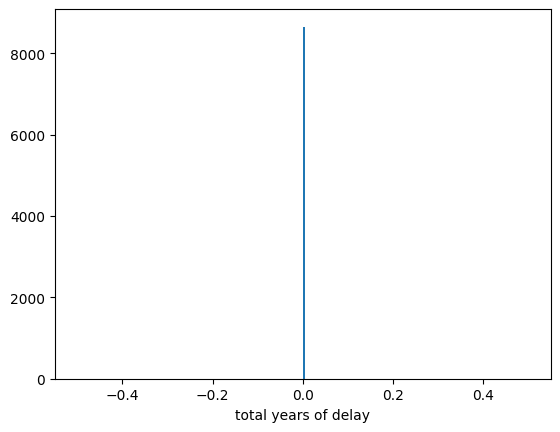

In [6]:
variables = VARIABLE_SETS['Cotra2022']
variables['RUNS'] = RUNS
variables['CURRENT_YEAR'] = CURRENT_YEAR
variables['MAX_YEAR'] = MAX_YEAR
run_timelines_model(variables, cores=5, runs=RUNS)

In [7]:
print('File last ran: {}'.format(dt.now()))

File last ran: 2024-03-18 13:45:39.329661
